# Projet : réaliser une étude sur les produits alimentaires

## 1 - Contexte

Vous réalisez une mission "UFC-Que Choisir". Cette association vous demande de réaliser une étude 
sur la qualité des produits alimentaires mis à disposition des consommateurs par les marques. Cette étude a vocation à aider les consommateurs dans leurs choix.

L'objectif est d'analyser les marques sur au moins les critères suivants : la qualité nutritionnelle, l'impact environnemental, la part des produits biologiques.


Pour cela, vous proposer d'utiliser les données de l'application Yuka

Voici une liste des questions que se pose l'association : 

- Quelles sont les marques qui jouent le jeu et affichent le nutriscore ? Lesquelles ne le font pas?

- Quelles sont les marques qui ont le plus recours aux additifs nocifs

- Quelles sont les marques qui présentent des produits avec la meilleure qualité nutritionnelle ? Les pires ?

- Quelles sont les marques qui jouent le jeu et affichent l'ecosore ? Lesquelles ne le font pas?

- Quelles sont les marques qui semblent le plus respectueuses de l'environnement ? le moins?

- Quelles sont les marques qui proposent essentiellement des produits biologiques ?

- Observe-t-on une corrélation entre le caratère bio des produits et la qualité nutritionnelle ? 

- Observe-t-on une corrélation entre le caratère bio des produits et l'aspect envionnemental ?

- Observe-t-on une corrélation entre la la qualité nutritionnelle et l'aspec envionnemental ?

- Quelles marques faut-il recommander ? 

- Quelles marques ne faut-il surtout pas recommander ? 




## 2 - Données

3 fichiers issues de l'application Yuka sont à exploiter pour réaliser l'analyse. 


Agriculture_biologique_final.csv

Qualite nutritionnelle_final.csv

Impact environnemental_final.csv

Voici le lien pour récupérer les fichiers

# https://www.dropbox.com/sh/pwsv4coi2sbbhyo/AABJ81-xWu3K2Cl0DOCmwbGsa?dl=0

## 3 - Consignes

Travail de groupe de 3 personnes. 

Pour l'évaluation CC, chaque groupe doit livrer à la fin des sessions :

    - un rapport synthétisant l'analyse faite et les conculusions obtenues
    
    - un notebook nettoyé et commenté

## 4 - Contraintes

Votre analyse doit inclure des analyses univariées et multivariées


## 5 - Préparation de l'environnement

In [1]:
# Import de la librairie Pandas
import pandas as pd

# Import des librairies
import numpy as np
import scipy
import seaborn as sns

# Import de la librairie plotly
import plotly.express as px
import plotly.graph_objects as go

# Import de la librairie matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

pd.set_option("display.max_columns", None)
sns.set()

## 6 - A vous de jouer¶

Inspirez-vous du TP vu en cours

In [2]:
bio = pd.read_csv("Agriculture_biologique_final.csv", sep="\t")
env = pd.read_csv("Impact environnemental_final.csv", sep="\t", low_memory=False)
quali = pd.read_csv("Qualite nutritionnelle_final.csv", sep="\t", low_memory=False)

In [3]:
#Les fonctions pour initialiser les DF

def bio_init():
    bio = pd.read_csv("Agriculture_biologique_final.csv", sep="\t")
    return bio
def env_init():
    env = pd.read_csv("Impact environnemental_final.csv", sep="\t", low_memory=False)
    return env
def quali_init():
    quali = pd.read_csv("Qualite nutritionnelle_final.csv", sep="\t", low_memory=False)
    return quali

### Nettoyage

In [4]:
env.drop(columns = "serving_size", inplace = True)
quali.drop(columns = "serving_size", inplace = True)
bio = bio.drop(columns = "serving_size")

In [5]:
quali = quali[quali.brands_tags.notna()]
quali = quali[quali.product_name.notna()]
quali['nutriscore_grade'].replace('unknown', np.NaN, inplace = True)
quali['nutriscore_grade'].replace('not-applicable', np.NaN, inplace = True)
env = env[env.brands_tags.notna()]
env = env[env.product_name.notna()]
env['ecoscore_grade'].replace('unknown', np.NaN, inplace = True)
env['ecoscore_grade'].replace('not-applicable', np.NaN, inplace = True)

In [6]:
quali["nutriscore_grade"] =quali["nutriscore_grade"].fillna("NC")
env["ecoscore_grade"] =env["ecoscore_grade"].fillna("NC")

In [7]:
bio

,product_name,brands_tags,est_bio
0,Skyr,danone,False
1,moutarde au moût de raisin,courte-paille,False
2,Solène céréales poulet,crous,False
3,Tarte noix de coco,"crous-resto,crous",False
4,Crème dessert chocolat,ferme-de-la-fremondiere,False
...,...,...,...
463917,Saveur ABRICIT,gerble,False
463918,Lindt pâte à tartiner,lindt,False
463919,Biodrink antioxydant pendant effort,punch-power,True
463920,miel de fleurs sauvage,miellerie-de-la-natouze,False


In [8]:
quali

,code,product_name,quantity,brands_tags,countries_tags,image_url,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif
0,00000000000026772226,Skyr,480 g,danone,en:france,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.090,0.0
3,0000000000100,moutarde au moût de raisin,100g,courte-paille,en:france,https://images.openfoodfacts.org/images/produc...,fr:eau-graines-de-teguments-de-moutarde-vinaig...,d,NaN,8.2,2.20,22.0,5.1,4.600,0.0
15,0000000001199,Solène céréales poulet,NaN,crous,en:france,https://images.openfoodfacts.org/images/produc...,"en:antioxidant,en:colour,en:tomato,en:vegetabl...",NC,219.0,5.9,0.50,1.7,9.7,0.464,0.0
16,0000000001281,Tarte noix de coco,NaN,"crous-resto,crous",en:france,https://images.openfoodfacts.org/images/produc...,NaN,d,381.0,22.0,15.50,21.9,4.6,0.100,0.0
20,0000000001663,Crème dessert chocolat,NaN,ferme-de-la-fremondiere,en:france,https://images.openfoodfacts.org/images/produc...,"en:whole-milk,en:dairy,en:milk,en:sugar,en:add...",NC,0.0,0.0,0.00,0.0,0.0,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932792,998042,Saveur ABRICIT,NaN,gerble,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NC,45.0,1.8,0.01,1.5,9.7,0.130,0.0
932803,9990000,Lindt pâte à tartiner,NaN,lindt,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NC,NaN,NaN,NaN,NaN,NaN,NaN,0.0
932820,9995545314,Biodrink antioxydant pendant effort,NaN,punch-power,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NC,384.0,0.1,0.10,59.0,0.1,1.500,0.0
932823,9998110000007,miel de fleurs sauvage,NaN,miellerie-de-la-natouze,en:france,NaN,NaN,NC,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [9]:
env.describe(include = "all")

,code,product_name,quantity,brands_tags,countries_tags,image_url,ecoscore_grade,est_plastique,est_palm,est_cocoa
count,456563,456563,238003,456563,456563,411770,456563,456563,456563,456563
unique,424591,311711,21390,57779,1739,389617,6,2,2,2
top,3272320012507,Comté,500 g,carrefour,en:france,https://images.openfoodfacts.org/images/produc...,NC,False,False,False
freq,3,468,10482,11664,408844,13,244567,372111,438237,452141


# Analyse des marques

### Quelles sont les marques qui jouent le jeu et affichent le nutriscore ? Lesquelles ne le font pas?

In [10]:
nutriscore = quali[["brands_tags","product_name","nutriscore_grade"]]
nutriscore = nutriscore.groupby("brands_tags", as_index= False).count()

# Supprimer toutes les marques avec un échantillon de moins de 500 produits
ind = nutriscore[nutriscore["product_name"] <500].index
nutriscore.drop(ind, inplace = True)

# Créer une colonne ratio 
nutriscore["ratio nutriscore"] = nutriscore["nutriscore_grade"]/nutriscore["product_name"]*100

# Trier les marques qui affichent le plus leur nutriscore
nutriscore.sort_values("ratio nutriscore", ascending = False).head(5)

,brands_tags,product_name,nutriscore_grade,ratio nutriscore
1792,andros,835,835,100.0
37333,migros,575,575,100.0
40121,netto,1858,1858,100.0
39866,nestle,2794,2794,100.0
39096,myprotein,1187,1187,100.0


In [11]:
# on trie les marques qui affichent le moins le nutriscore
nutriscore.sort_values("ratio nutriscore", ascending = False).tail(5)

,brands_tags,product_name,nutriscore_grade,ratio nutriscore
19274,franprix,1914,1914,100.0
18734,fleury-michon,1578,1578,100.0
18443,findus,502,502,100.0
16007,eco,633,633,100.0
57196,yoplait,789,789,100.0


### Quelles sont les marques qui ont le plus recours aux additifs nocifs ?

In [12]:
nocifs_marque = quali.groupby(["brands_tags"]).agg({'nb_nocif':"sum"}).sort_values('nb_nocif', ascending=False)
nocifs_marque.head(10)

,nb_nocif
brands_tags,
sodastream,29.0
"nestle,sveltesse",10.0
a-rom,9.0
dove,8.0
nestle,7.0
schweppes,7.0
freeway,6.0
"sveltesse,nestle",5.0
leader-price,5.0


In [13]:
#on crée deux colonnes : une pour les produit avec additif "nb_nocif_1" et l'autre sans additif "nb_nocif_0"
quali["nb_nocif_1"] = quali["nb_nocif"].loc[quali["nb_nocif"] == 1]
quali["nb_nocif_0"] = quali["nb_nocif"].loc[quali["nb_nocif"] == 0]

In [14]:
nocif = quali[["brands_tags","product_name","nb_nocif_1","nb_nocif_0"]]
nocif = nocif.groupby("brands_tags").count()

# on supprime toutes les marques avec un échantillon de moins de 500 produits
ind2 = nocif[nocif["product_name"] <500].index
nocif.drop(ind2, inplace = True)

nocif["ratio_nocif"] = nocif["nb_nocif_1"]/nocif["product_name"]*100


nocif.sort_values("ratio_nocif", ascending = False).head(10)

,product_name,nb_nocif_1,nb_nocif_0,ratio_nocif
brands_tags,,,,
eco,633,4,629,0.631912
migros,575,3,572,0.521739
le-comptoir-de-mathilde,758,3,755,0.395778
sans-marque,677,2,675,0.295421
nestle,2794,7,2787,0.250537
sainte-lucie,535,1,534,0.186916
lucien-georgelin,580,1,579,0.172414
dia,789,1,788,0.126743
leclerc,1771,2,1769,0.112931


### Quelles sont les marques qui présentent des produits avec la meilleure qualité nutritionnelle ? Les pires ?

In [15]:
nutriscore2 = quali.pivot_table(index="brands_tags", columns =["nutriscore_grade"], values = "product_name", aggfunc ={"product_name" : "count"}, margins=True)

# Supprimer la ligne "All"
nutriscore2.drop("All", axis=0, inplace=True)

# on supprime toutes les marques avec un échantillon de moins de 500 produits avec un nurtiscore
# filtrer à 500 sur le product_name 
ind2 = nutriscore2[nutriscore2["All"] <500].index
nutriscore2.drop(ind2, inplace = True)

# on remplace les NaN par la valeur 0
nutriscore2 = nutriscore2.fillna(0)
nutriscore2

nutriscore_grade,NC,a,b,c,d,e,All
brands_tags,,,,,,,
andros,311.0,249.0,40.0,150.0,48.0,37.0,835
auchan,4038.0,1669.0,1081.0,1484.0,1826.0,964.0,11062
barilla,318.0,223.0,26.0,36.0,18.0,13.0,634
belle-france,267.0,257.0,185.0,335.0,373.0,252.0,1669
bio-village,765.0,94.0,30.0,42.0,92.0,16.0,1039
...,...,...,...,...,...,...,...
tropicana,200.0,7.0,13.0,239.0,35.0,54.0,548
u,2150.0,977.0,728.0,935.0,1226.0,655.0,6671
"u-bio,u",140.0,149.0,73.0,85.0,106.0,65.0,618


In [16]:
#scoring
scores_nutri = {"a":5, "b":4, "c":3, "d":2, "e":1}
nutriscore2['score_total_marque'] = nutriscore2[['a', 'b', 'c', 'd', 'e']].apply(lambda row: sum(row * pd.Series(scores_nutri)), axis=1)
nutriscore2

nutriscore_grade,NC,a,b,c,d,e,All,score_total_marque
brands_tags,,,,,,,,
andros,311.0,249.0,40.0,150.0,48.0,37.0,835,1988.0
auchan,4038.0,1669.0,1081.0,1484.0,1826.0,964.0,11062,21737.0
barilla,318.0,223.0,26.0,36.0,18.0,13.0,634,1376.0
belle-france,267.0,257.0,185.0,335.0,373.0,252.0,1669,4028.0
bio-village,765.0,94.0,30.0,42.0,92.0,16.0,1039,916.0
...,...,...,...,...,...,...,...,...
tropicana,200.0,7.0,13.0,239.0,35.0,54.0,548,928.0
u,2150.0,977.0,728.0,935.0,1226.0,655.0,6671,13709.0
"u-bio,u",140.0,149.0,73.0,85.0,106.0,65.0,618,1569.0


In [17]:
nutriscore2 ['ratio_a'] = nutriscore2["a"] / nutriscore2["All"] * 100
nutriscore2 ['ratio_e'] = nutriscore2["e"] / nutriscore2["All"] * 100
#nutriscore2 ['ratio_score_total_marque'] = nutriscore2["score_total_marque"] / nutriscore2["score_total_marque"].sum() * 100
nutriscore2 ['ratio_score_nutri_marque'] = nutriscore2["score_total_marque"] / nutriscore2["All"].sum() * 100

In [18]:
# Marque avec le plus grand de produits noté A sur l'ensemble de ses produits affichant le nutriscore 
nutriscore2.sort_values("ratio_a", ascending = False).head(5)

nutriscore_grade,NC,a,b,c,d,e,All,score_total_marque,ratio_a,ratio_e,ratio_score_nutri_marque
brands_tags,,,,,,,,,,,
la-nouvelle-agriculture,228.0,560.0,260.0,27.0,32.0,5.0,1112,3990.0,50.359712,0.449640,3.333918
bonduelle,459.0,486.0,104.0,35.0,2.0,0.0,1086,2955.0,44.751381,0.000000,2.469105
primeal,327.0,272.0,51.0,42.0,23.0,8.0,723,1744.0,37.621024,1.106501,1.457231
barilla,318.0,223.0,26.0,36.0,18.0,13.0,634,1376.0,35.173502,2.050473,1.149742
panzani,323.0,258.0,85.0,82.0,35.0,0.0,783,1946.0,32.950192,0.000000,1.626016


In [19]:
# Marque avec le plus grand de produits noté E sur l'ensemble de ses produits affichant le nutriscore 
nutriscore2.sort_values("ratio_e", ascending = False).head(5)

nutriscore_grade,NC,a,b,c,d,e,All,score_total_marque,ratio_a,ratio_e,ratio_score_nutri_marque
brands_tags,,,,,,,,,,,
lindt,502.0,0.0,0.0,0.0,12.0,486.0,1000,510.0,0.000000,48.600000,0.426140
milka,427.0,0.0,0.0,2.0,21.0,266.0,716,314.0,0.000000,37.150838,0.262369
delpeyrat,207.0,4.0,15.0,8.0,191.0,238.0,663,724.0,0.603318,35.897436,0.604952
st-michel,143.0,0.0,0.0,10.0,211.0,144.0,508,596.0,0.000000,28.346457,0.497999
lu,211.0,1.0,4.0,49.0,139.0,126.0,530,572.0,0.188679,23.773585,0.477945


In [20]:
# Marque avec le meilleur scoring nutri
best_scoring_nutriscore = nutriscore2.sort_values("ratio_score_nutri_marque", ascending = False).head(5)
best_scoring_nutriscore

nutriscore_grade,NC,a,b,c,d,e,All,score_total_marque,ratio_a,ratio_e,ratio_score_nutri_marque
brands_tags,,,,,,,,,,,
auchan,4038.0,1669.0,1081.0,1484.0,1826.0,964.0,11062,21737.0,15.087688,8.714518,18.162752
carrefour,5177.0,1294.0,944.0,1314.0,1884.0,1051.0,11664,19007.0,11.093964,9.010631,15.881650
u,2150.0,977.0,728.0,935.0,1226.0,655.0,6671,13709.0,14.645480,9.818618,11.454808
casino,1551.0,695.0,531.0,744.0,869.0,449.0,4839,10018.0,14.362472,9.278777,8.370725
leader-price,1420.0,529.0,498.0,720.0,849.0,522.0,4538,9017.0,11.657118,11.502865,7.534321


In [21]:
# Marque avec le moins bon scoring nutri
worst_scoring_nutriscore = nutriscore2.sort_values("ratio_score_nutri_marque", ascending = False).tail(5)
worst_scoring_nutriscore

nutriscore_grade,NC,a,b,c,d,e,All,score_total_marque,ratio_a,ratio_e,ratio_score_nutri_marque
brands_tags,,,,,,,,,,,
maggi,518.0,6.0,27.0,34.0,40.0,10.0,635,330.0,0.944882,1.574803,0.275738
milka,427.0,0.0,0.0,2.0,21.0,266.0,716,314.0,0.000000,37.150838,0.262369
sainte-lucie,455.0,5.0,9.0,19.0,38.0,9.0,535,203.0,0.934579,1.682243,0.169620
ducros,645.0,13.0,10.0,8.0,27.0,6.0,709,189.0,1.833568,0.846262,0.157922
palais-des-thes,979.0,0.0,32.0,13.0,3.0,2.0,1029,175.0,0.000000,0.194363,0.146224


### Quelles sont les marques qui jouent le jeu et affichent l'ecosore ? Lesquelles ne le font pas?

In [22]:
écoscore = env[["brands_tags","product_name","ecoscore_grade"]]
écoscore = écoscore.groupby(["brands_tags"]).agg({'product_name':"count", "ecoscore_grade":"count"})

# Supprimer toutes les marques avec un échantillon de moins de 500 produits
ind = écoscore[écoscore["product_name"] <500].index
écoscore.drop(ind, inplace = True)

# Créer une colonne ratio 
écoscore["ratio écoscore"] = écoscore["ecoscore_grade"]/écoscore["product_name"]*100

# Trier les marques qui affichent le plus leur nutriscore
écoscore.sort_values("ratio écoscore", ascending = False).head(5)

,product_name,ecoscore_grade,ratio écoscore
brands_tags,,,
andros,835,835,100.0
migros,575,575,100.0
netto,1858,1858,100.0
nestle,2794,2794,100.0
myprotein,1187,1187,100.0


In [23]:
écoscore.sort_values("ratio écoscore", ascending = False).tail(5)

,product_name,ecoscore_grade,ratio écoscore
brands_tags,,,
franprix,1914,1914,100.0
fleury-michon,1578,1578,100.0
findus,502,502,100.0
eco,633,633,100.0
yoplait,789,789,100.0


### Quelles sont les marques qui semblent le plus respectueuses de l'environnement ? le moins?

In [24]:
ecoscore2 = env.pivot_table(index="brands_tags", columns ="ecoscore_grade", values = "product_name", aggfunc ={"product_name" : "count"}, margins=True)

# Supprimer la ligne "All"
ecoscore2.drop("All", axis=0, inplace=True)

# on supprime toutes les marques avec un échantillon de moins de 500 produits avec un nurtiscore
# filtrer à 500 sur le product_name 
ind3 = ecoscore2[ecoscore2["All"] <500].index
ecoscore2.drop(ind3, inplace = True)

# on remplace les NaN par la valeur 0
ecoscore2 = ecoscore2.fillna(0)
ecoscore2

ecoscore_grade,NC,a,b,c,d,e,All
brands_tags,,,,,,,
andros,368.0,54.0,248.0,67.0,95.0,3.0,835
auchan,4578.0,379.0,1825.0,1258.0,1768.0,1254.0,11062
barilla,407.0,30.0,85.0,82.0,22.0,8.0,634
belle-france,326.0,64.0,437.0,278.0,337.0,227.0,1669
bio-village,648.0,12.0,176.0,65.0,105.0,33.0,1039
...,...,...,...,...,...,...,...
tropicana,245.0,2.0,16.0,79.0,206.0,0.0,548
u,2457.0,401.0,1147.0,1156.0,905.0,605.0,6671
"u-bio,u",154.0,123.0,158.0,116.0,56.0,11.0,618


In [25]:
#scoring
scores_eco = {"a":5, "b":4, "c":3, "d":2, "e":1}
ecoscore2['score_total_marque'] = ecoscore2[['a', 'b', 'c', 'd', 'e']].apply(lambda row: sum(row * pd.Series(scores_eco)), axis=1)
ecoscore2

ecoscore_grade,NC,a,b,c,d,e,All,score_total_marque
brands_tags,,,,,,,,
andros,368.0,54.0,248.0,67.0,95.0,3.0,835,1656.0
auchan,4578.0,379.0,1825.0,1258.0,1768.0,1254.0,11062,17759.0
barilla,407.0,30.0,85.0,82.0,22.0,8.0,634,788.0
belle-france,326.0,64.0,437.0,278.0,337.0,227.0,1669,3803.0
bio-village,648.0,12.0,176.0,65.0,105.0,33.0,1039,1202.0
...,...,...,...,...,...,...,...,...
tropicana,245.0,2.0,16.0,79.0,206.0,0.0,548,723.0
u,2457.0,401.0,1147.0,1156.0,905.0,605.0,6671,12476.0
"u-bio,u",154.0,123.0,158.0,116.0,56.0,11.0,618,1718.0


In [26]:
ecoscore2 ['ratio_a'] = ecoscore2["a"] / ecoscore2["All"] * 100
ecoscore2 ['ratio_e'] = ecoscore2["e"] / ecoscore2["All"] * 100
#ecoscore2 ['ratio_score_total_marque'] = ecoscore2["score_total_marque"] / ecoscore2["score_total_marque"].sum() * 100
ecoscore2 ['ratio_score_eco_marque'] = ecoscore2["score_total_marque"] / ecoscore2["All"].sum() * 100

In [27]:
# Marque avec le plus grand de produits noté A sur l'ensemble de ses produits affichant le nutriscore 
ecoscore2.sort_values("ratio_a", ascending = False).head(5)

ecoscore_grade,NC,a,b,c,d,e,All,score_total_marque,ratio_a,ratio_e,ratio_score_eco_marque
brands_tags,,,,,,,,,,,
"u-bio,u",154.0,123.0,158.0,116.0,56.0,11.0,618,1718.0,19.902913,1.779935,1.435507
lipton,547.0,135.0,97.0,71.0,2.0,0.0,852,1280.0,15.845070,0.000000,1.069528
"carrefour-bio,carrefour",109.0,83.0,172.0,93.0,55.0,28.0,540,1520.0,15.370370,5.185185,1.270064
sainte-lucie,314.0,57.0,124.0,10.0,15.0,15.0,535,856.0,10.654206,2.803738,0.715247
"bio-village,marque-repere",262.0,91.0,271.0,140.0,71.0,23.0,858,2124.0,10.606061,2.680653,1.774747


In [28]:
# Marque avec le plus grand de produits noté E sur l'ensemble de ses produits affichant le nutriscore 
ecoscore2.sort_values("ratio_e", ascending = False).head(5)

ecoscore_grade,NC,a,b,c,d,e,All,score_total_marque,ratio_a,ratio_e,ratio_score_eco_marque
brands_tags,,,,,,,,,,,
delpeyrat,164.0,3.0,11.0,20.0,125.0,340.0,663,709.0,0.452489,51.282051,0.592418
labeyrie,213.0,1.0,13.0,40.0,170.0,377.0,814,894.0,0.122850,46.314496,0.746998
haribo,1045.0,0.0,27.0,3.0,22.0,457.0,1554,618.0,0.000000,29.407979,0.516381
lindt,705.0,0.0,1.0,4.0,16.0,274.0,1000,322.0,0.000000,27.400000,0.269053
le-gaulois,552.0,1.0,24.0,263.0,1016.0,633.0,2489,3555.0,0.040177,25.431900,2.970446


In [29]:
# Marque avec le meilleur scoring éco
best_scoring_ecoscore = ecoscore2.sort_values("ratio_score_eco_marque", ascending = False).head(5)
best_scoring_ecoscore

ecoscore_grade,NC,a,b,c,d,e,All,score_total_marque,ratio_a,ratio_e,ratio_score_eco_marque
brands_tags,,,,,,,,,,,
auchan,4578.0,379.0,1825.0,1258.0,1768.0,1254.0,11062,17759.0,3.426144,11.336106,14.838861
carrefour,5121.0,411.0,1641.0,1277.0,1889.0,1325.0,11664,17553.0,3.523663,11.359739,14.666734
u,2457.0,401.0,1147.0,1156.0,905.0,605.0,6671,12476.0,6.011093,9.069105,10.424552
casino,1925.0,174.0,851.0,636.0,763.0,490.0,4839,8198.0,3.595784,10.126059,6.849990
leader-price,1718.0,162.0,788.0,566.0,826.0,478.0,4538,7790.0,3.569855,10.533275,6.509078


In [30]:
# Marque avec le moins bon scoring éco
worst_scoring_ecoscore = ecoscore2.sort_values("ratio_score_eco_marque", ascending = False).tail(5)
worst_scoring_ecoscore

ecoscore_grade,NC,a,b,c,d,e,All,score_total_marque,ratio_a,ratio_e,ratio_score_eco_marque
brands_tags,,,,,,,,,,,
saint-alby,352.0,0.0,0.0,26.0,48.0,109.0,535,283.0,0.000000,20.373832,0.236466
palais-des-thes,960.0,17.0,46.0,2.0,4.0,0.0,1029,283.0,1.652089,0.000000,0.236466
prozis,591.0,1.0,12.0,23.0,17.0,9.0,653,165.0,0.153139,1.378254,0.137869
myprotein,1120.0,0.0,12.0,16.0,26.0,13.0,1187,161.0,0.000000,1.095198,0.134527
maggi,586.0,7.0,17.0,4.0,3.0,18.0,635,139.0,1.102362,2.834646,0.116144


In [31]:
# best_scoring_ecoscore.plot.bar(title="Top 5 marques au Ecoscore")

### Quelles sont les marques qui proposent essentiellement des produits biologiques ?

In [32]:
bio_tem = bio.copy()
bio_tem = bio_tem[["brands_tags","est_bio"]]

bio_ratio = bio_tem.groupby(by="brands_tags").est_bio.agg([sum,"count"]).sort_values("sum", ascending=False)

# Créer une colonne ratio
bio_ratio["ratio_bio"] = bio_ratio["sum"]/bio_ratio["count"]*100

# Supprimer toutes les marques avec un échantillon de moins de 500 produits
ind2 = bio_ratio[bio_ratio["count"] <500].index
bio_ratio.drop(ind2, inplace = True)

# Trier les marques ont la plus grande proportion de produits bio
bio_ratio.sort_values("ratio_bio", ascending=False).head(10)

,sum,count,ratio_bio
brands_tags,,,
"carrefour-bio,carrefour",539,542,99.446494
"u-bio,u",610,618,98.705502
"bio-village,marque-repere",852,866,98.383372
biocoop,768,828,92.753623
bonneterre,552,616,89.610390
bio-village,947,1060,89.339623
primeal,648,728,89.010989
moulin-des-moines,792,892,88.789238
la-vie-claire,1938,2187,88.614540


In [33]:
# Trier les marques ont la moins grande proportion de produits bio
bio_ratio.sort_values("ratio_bio", ascending=False).tail(10)

,sum,count,ratio_bio
brands_tags,,,
reflets-de-france,3,533,0.562852
toupargel,3,673,0.445765
le-gaulois,12,2769,0.433369
"u-saveurs,u",2,507,0.394477
bonne-maman,2,822,0.243309
milka,1,733,0.136426
lindt,1,1018,0.098232
coca-cola,0,513,0.000000
eco,0,646,0.000000


### Observe-t-on une corrélation entre le caratère bio des produits et la qualité nutritionnelle ?

In [34]:
corré_bio_quali_nutri = pd.merge(bio,quali, on = ['brands_tags','product_name'], how= 'inner', indicator = True)
corré_bio_quali_nutri

,product_name,brands_tags,est_bio,code,quantity,countries_tags,image_url,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif,nb_nocif_1,nb_nocif_0,_merge
0,Skyr,danone,False,00000000000026772226,480 g,en:france,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0,NaN,0.0,both
1,Skyr,danone,False,03414569,NaN,en:france,https://images.openfoodfacts.org/images/produc...,"en:skimmed-milk,en:dairy,en:milk,en:lactic-fer...",a,57.0,0.2,0.10,3.9,10.0,0.09,0.0,NaN,0.0,both
2,Skyr,danone,False,04319111,825 g,en:france,https://images.openfoodfacts.org/images/produc...,"en:skimmed-milk,en:dairy,en:milk,fr:ferments-l...",NC,NaN,0.2,NaN,3.9,10.0,0.09,0.0,NaN,0.0,both
3,Skyr,danone,False,1033097270864,4,en:france,NaN,NaN,NC,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,both
4,Skyr,danone,False,3033491270864,2 x 140 g,"en:france,en:switzerland",https://images.openfoodfacts.org/images/produc...,"en:skimmed-milk,en:dairy,en:milk,en:lactic-fer...",a,57.0,0.2,0.10,3.9,10.0,0.10,0.0,NaN,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970490,Nutra'cake framboise,delical,False,996299394093,NaN,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NC,381.0,12.7,6.70,29.0,15.6,0.80,0.0,NaN,0.0,both
970491,Chocolat noir patissier,monoprix-bio,True,997046,NaN,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NC,578.0,39.0,24.00,46.0,5.1,0.00,0.0,NaN,0.0,both
970492,Saveur ABRICIT,gerble,False,998042,NaN,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NC,45.0,1.8,0.01,1.5,9.7,0.13,0.0,NaN,0.0,both
970493,Lindt pâte à tartiner,lindt,False,9990000,NaN,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NC,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,both


In [35]:
# Création de ma table de contingence
X = "nutriscore_grade"
Y = "est_bio"

cont_1 = corré_bio_quali_nutri[[X,Y]].dropna().pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_1

est_bio,False,True,Total
nutriscore_grade,,,
NC,365272,42483,407755
a,132767,16158,148925
b,81011,8539,89550
c,96270,11545,107815
d,129636,14307,143943
e,65480,7027,72507
Total,870436,100059,970495


In [36]:
# Regardons la distribution si les variables étaient complétement independantes

tx = cont_1.loc[:,["Total"]]
ty = cont_1.loc[["Total"],:]
n = len(corré_bio_quali_nutri[[X,Y]].dropna())
indep = round(tx.dot(ty) / n)
indep

est_bio,False,True,Total
nutriscore_grade,,,
NC,365715.0,42040.0,407755.0
a,133571.0,15354.0,148925.0
b,80317.0,9233.0,89550.0
c,96699.0,11116.0,107815.0
d,129102.0,14841.0,143943.0
e,65031.0,7476.0,72507.0
Total,870436.0,100059.0,970495.0


In [37]:
# importons le module chi2_contingency de la librairie scipy pour faire un chi2
from scipy.stats import chi2_contingency as chi2_contingency

In [38]:
chi2, p, dof, expected_freq= chi2_contingency(cont_1)
chi2

180.09816812735139

In [39]:
p

4.072974559746866e-32

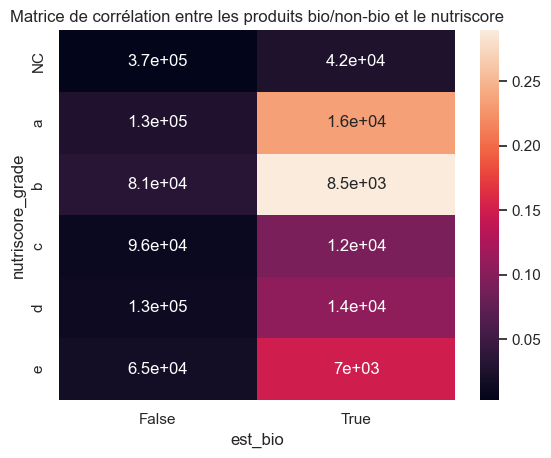

In [40]:
import seaborn as sns

c = cont_1.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Matrice de corrélation entre les produits bio/non-bio et le nutriscore')
plt.show()

In [41]:
# import plotly.express as px
# fig = px.scatter(corré_bio_quali_nutri, x="nutriscore_grade", y="est_bio")
# fig.show()

### Observe-t-on une corrélation entre le caratère bio des produits et l'aspect envionnemental ?

In [42]:
corré_bio_env = pd.merge(bio,env, on = ['brands_tags','product_name'], how= 'inner', indicator = True)
corré_bio_env

,product_name,brands_tags,est_bio,code,quantity,countries_tags,image_url,ecoscore_grade,est_plastique,est_palm,est_cocoa,_merge
0,Skyr,danone,False,00000000000026772226,480 g,en:france,https://images.openfoodfacts.org/images/produc...,d,False,False,False,both
1,Skyr,danone,False,03414569,NaN,en:france,https://images.openfoodfacts.org/images/produc...,b,False,False,False,both
2,Skyr,danone,False,04319111,825 g,en:france,https://images.openfoodfacts.org/images/produc...,NC,True,False,False,both
3,Skyr,danone,False,1033097270864,4,en:france,NaN,d,False,False,False,both
4,Skyr,danone,False,3033491270864,2 x 140 g,"en:france,en:switzerland",https://images.openfoodfacts.org/images/produc...,b,True,False,False,both
...,...,...,...,...,...,...,...,...,...,...,...,...
970490,Nutra'cake framboise,delical,False,996299394093,NaN,en:france,https://images.openfoodfacts.org/images/produc...,NC,False,False,False,both
970491,Chocolat noir patissier,monoprix-bio,True,997046,NaN,en:france,https://images.openfoodfacts.org/images/produc...,NC,False,False,False,both
970492,Saveur ABRICIT,gerble,False,998042,NaN,en:france,https://images.openfoodfacts.org/images/produc...,NC,False,False,False,both
970493,Lindt pâte à tartiner,lindt,False,9990000,NaN,en:france,https://images.openfoodfacts.org/images/produc...,NC,False,False,False,both


In [43]:
# Création de ma table de contingence
X = "ecoscore_grade"
Y = "est_bio"

cont_2 = corré_bio_env[[X,Y]].dropna().pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_2

est_bio,False,True,Total
ecoscore_grade,,,
NC,396912,44214,441126
a,13545,6249,19794
b,65416,20511,85927
c,67860,11630,79490
d,238178,13387,251565
e,88525,4068,92593
Total,870436,100059,970495


In [44]:
# Regardons la distibution si les variables étaient complétement independantes

tx = cont_2.loc[:,["Total"]]
ty = cont_2.loc[["Total"],:]
n = len(corré_bio_env[[X,Y]].dropna())
indep2 = round(tx.dot(ty) / n)
indep2

est_bio,False,True,Total
ecoscore_grade,,,
NC,395645.0,45481.0,441126.0
a,17753.0,2041.0,19794.0
b,77068.0,8859.0,85927.0
c,71295.0,8195.0,79490.0
d,225628.0,25937.0,251565.0
e,83047.0,9546.0,92593.0
Total,870436.0,100059.0,970495.0


In [45]:
# importons le module chi2_contingency de la librairie scipy pour faire un chi2
from scipy.stats import chi2_contingency as chi2_contingency

In [46]:
chi2, p, dof, expected_freq= chi2_contingency(cont_2)
chi2

38681.251542127604

In [47]:
p

0.0

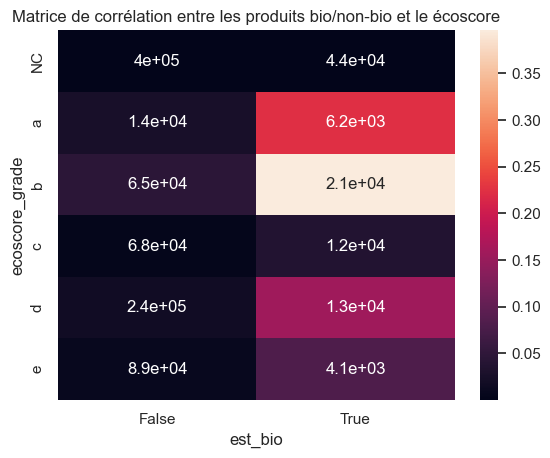

In [48]:
import seaborn as sns

c = cont_2.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep2)**2/indep2
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Matrice de corrélation entre les produits bio/non-bio et le écoscore')
plt.show()

### Observe-t-on une corrélation entre la la qualité nutritionnelle et l'aspect envionnemental ?

In [49]:
corré_quali_nutri_env = pd.merge(quali,env, on = ['code'], how= 'inner', indicator = True)
corré_quali_nutri_env

,code,product_name_x,quantity_x,brands_tags_x,countries_tags_x,image_url_x,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif,nb_nocif_1,nb_nocif_0,product_name_y,quantity_y,brands_tags_y,countries_tags_y,image_url_y,ecoscore_grade,est_plastique,est_palm,est_cocoa,_merge
0,00000000000026772226,Skyr,480 g,danone,en:france,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.090,0.0,NaN,0.0,Skyr,480 g,danone,en:france,https://images.openfoodfacts.org/images/produc...,d,False,False,False,both
1,0000000000100,moutarde au moût de raisin,100g,courte-paille,en:france,https://images.openfoodfacts.org/images/produc...,fr:eau-graines-de-teguments-de-moutarde-vinaig...,d,NaN,8.2,2.20,22.0,5.1,4.600,0.0,NaN,0.0,moutarde au moût de raisin,100g,courte-paille,en:france,https://images.openfoodfacts.org/images/produc...,c,False,False,False,both
2,0000000001199,Solène céréales poulet,NaN,crous,en:france,https://images.openfoodfacts.org/images/produc...,"en:antioxidant,en:colour,en:tomato,en:vegetabl...",NC,219.0,5.9,0.50,1.7,9.7,0.464,0.0,NaN,0.0,Solène céréales poulet,NaN,crous,en:france,https://images.openfoodfacts.org/images/produc...,NC,False,False,False,both
3,0000000001281,Tarte noix de coco,NaN,"crous-resto,crous",en:france,https://images.openfoodfacts.org/images/produc...,NaN,d,381.0,22.0,15.50,21.9,4.6,0.100,0.0,NaN,0.0,Tarte noix de coco,NaN,"crous-resto,crous",en:france,https://images.openfoodfacts.org/images/produc...,NC,True,False,False,both
4,0000000001663,Crème dessert chocolat,NaN,ferme-de-la-fremondiere,en:france,https://images.openfoodfacts.org/images/produc...,"en:whole-milk,en:dairy,en:milk,en:sugar,en:add...",NC,0.0,0.0,0.00,0.0,0.0,0.000,0.0,NaN,0.0,Crème dessert chocolat,NaN,ferme-de-la-fremondiere,en:france,https://images.openfoodfacts.org/images/produc...,NC,False,False,False,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524156,99665555,La parisienne à poêler,NaN,bonduelle,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NC,52.0,0.6,0.10,2.1,1.7,0.470,0.0,NaN,0.0,La parisienne à poêler,NaN,bonduelle,en:france,https://images.openfoodfacts.org/images/produc...,NC,False,False,False,both
524157,997046,Chocolat noir patissier,NaN,monoprix-bio,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NC,578.0,39.0,24.00,46.0,5.1,0.000,0.0,NaN,0.0,Chocolat noir patissier,NaN,monoprix-bio,en:france,https://images.openfoodfacts.org/images/produc...,NC,False,False,False,both
524158,998042,Saveur ABRICIT,NaN,gerble,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NC,45.0,1.8,0.01,1.5,9.7,0.130,0.0,NaN,0.0,Saveur ABRICIT,NaN,gerble,en:france,https://images.openfoodfacts.org/images/produc...,NC,False,False,False,both
524159,9990000,Lindt pâte à tartiner,NaN,lindt,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NC,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,Lindt pâte à tartiner,NaN,lindt,en:france,https://images.openfoodfacts.org/images/produc...,NC,False,False,False,both


In [50]:
# Création de ma table de contingence
X = "ecoscore_grade"
Y = "nutriscore_grade"

cont_3 = corré_quali_nutri_env[[X,Y]].dropna().pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_3

nutriscore_grade,NC,a,b,c,d,e,Total
ecoscore_grade,,,,,,,
NC,215230,13614,12326,16071,18580,17254,293075
a,4714,4214,2382,2435,1579,241,15565
b,16454,13376,7606,12038,13176,3120,65770
c,9106,4460,4502,10213,13299,6672,48252
d,9538,3536,5791,11956,17638,11265,59724
e,8029,2623,4052,4212,11467,11392,41775
Total,263071,41823,36659,56925,75739,49944,524161


In [51]:
# Regardons la distibution si les variables étaient complétement independantes

tx = cont_3.loc[:,["Total"]]
ty = cont_3.loc[["Total"],:]
n = len(corré_quali_nutri_env[[X,Y]].dropna())
indep3 = round(tx.dot(ty) / n)
indep3

nutriscore_grade,NC,a,b,c,d,e,Total
ecoscore_grade,,,,,,,
NC,147091.0,23385.0,20497.0,31829.0,42348.0,27925.0,293075.0
a,7812.0,1242.0,1089.0,1690.0,2249.0,1483.0,15565.0
b,33009.0,5248.0,4600.0,7143.0,9503.0,6267.0,65770.0
c,24217.0,3850.0,3375.0,5240.0,6972.0,4598.0,48252.0
d,29975.0,4765.0,4177.0,6486.0,8630.0,5691.0,59724.0
e,20966.0,3333.0,2922.0,4537.0,6036.0,3980.0,41775.0
Total,263071.0,41823.0,36659.0,56925.0,75739.0,49944.0,524161.0


In [52]:
# importons le module chi2_contingency de la librairie scipy pour faire un chi2
from scipy.stats import chi2_contingency as chi2_contingency

In [53]:
chi2, p, dof, expected_freq= chi2_contingency(cont_3)
chi2

187710.25130539975

In [54]:
p

0.0

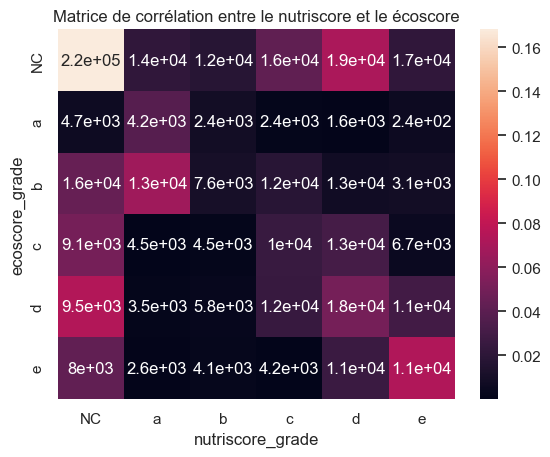

In [55]:
import seaborn as sns

c = cont_3.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep3)**2/indep3
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Matrice de corrélation entre le nutriscore et le écoscore')
plt.show()

### Quelles marques faut-il recommander ?

In [56]:
# Déterminons nos paramètres pour définir quelles marques recommandées
# exlusion les marques utilisant des additifs nocifs
# 50% de la note tient compte du Scoring nurtri
# 30% de la note tient compte du Scoring éco
# 20% de la note tient compte du Bio 

In [57]:
# exclure des recommandations les marques utlisant des additifs nocifs
#ind4 = nocif[nocif["nb_nocif_1"] >=1].index
#nocif.drop(ind4, inplace = True)
#nocif
nocif

,product_name,nb_nocif_1,nb_nocif_0,ratio_nocif
brands_tags,,,,
andros,835,0,835,0.000000
auchan,11062,1,11061,0.009040
barilla,634,0,634,0.000000
belle-france,1669,1,1668,0.059916
bio-village,1039,0,1039,0.000000
...,...,...,...,...
tropicana,548,0,548,0.000000
u,6671,0,6671,0.000000
"u-bio,u",618,0,618,0.000000


In [58]:
bio_ratio

,sum,count,ratio_bio
brands_tags,,,
la-vie-claire,1938,2187,88.614540
bio-village,947,1060,89.339623
"bio-village,marque-repere",852,866,98.383372
auchan,834,11152,7.478479
carrefour-bio,810,939,86.261981
...,...,...,...
milka,1,733,0.136426
lindt,1,1018,0.098232
coca-cola,0,513,0.000000


In [59]:
nutriscore2

nutriscore_grade,NC,a,b,c,d,e,All,score_total_marque,ratio_a,ratio_e,ratio_score_nutri_marque
brands_tags,,,,,,,,,,,
andros,311.0,249.0,40.0,150.0,48.0,37.0,835,1988.0,29.820359,4.431138,1.661110
auchan,4038.0,1669.0,1081.0,1484.0,1826.0,964.0,11062,21737.0,15.087688,8.714518,18.162752
barilla,318.0,223.0,26.0,36.0,18.0,13.0,634,1376.0,35.173502,2.050473,1.149742
belle-france,267.0,257.0,185.0,335.0,373.0,252.0,1669,4028.0,15.398442,15.098862,3.365670
bio-village,765.0,94.0,30.0,42.0,92.0,16.0,1039,916.0,9.047161,1.539942,0.765381
...,...,...,...,...,...,...,...,...,...,...,...
tropicana,200.0,7.0,13.0,239.0,35.0,54.0,548,928.0,1.277372,9.854015,0.775408
u,2150.0,977.0,728.0,935.0,1226.0,655.0,6671,13709.0,14.645480,9.818618,11.454808
"u-bio,u",140.0,149.0,73.0,85.0,106.0,65.0,618,1569.0,24.110032,10.517799,1.311007


In [60]:
ecoscore2

ecoscore_grade,NC,a,b,c,d,e,All,score_total_marque,ratio_a,ratio_e,ratio_score_eco_marque
brands_tags,,,,,,,,,,,
andros,368.0,54.0,248.0,67.0,95.0,3.0,835,1656.0,6.467066,0.359281,1.383701
auchan,4578.0,379.0,1825.0,1258.0,1768.0,1254.0,11062,17759.0,3.426144,11.336106,14.838861
barilla,407.0,30.0,85.0,82.0,22.0,8.0,634,788.0,4.731861,1.261830,0.658428
belle-france,326.0,64.0,437.0,278.0,337.0,227.0,1669,3803.0,3.834632,13.600959,3.177667
bio-village,648.0,12.0,176.0,65.0,105.0,33.0,1039,1202.0,1.154957,3.176131,1.004353
...,...,...,...,...,...,...,...,...,...,...,...
tropicana,245.0,2.0,16.0,79.0,206.0,0.0,548,723.0,0.364964,0.000000,0.604116
u,2457.0,401.0,1147.0,1156.0,905.0,605.0,6671,12476.0,6.011093,9.069105,10.424552
"u-bio,u",154.0,123.0,158.0,116.0,56.0,11.0,618,1718.0,19.902913,1.779935,1.435507


In [61]:
df1 = pd.merge(bio_ratio,nocif, on = 'brands_tags', how= 'outer', indicator = "True")
df1 = df1[["ratio_bio", "ratio_nocif"]]
df1

,ratio_bio,ratio_nocif
brands_tags,,
la-vie-claire,88.614540,0.000000
bio-village,89.339623,0.000000
"bio-village,marque-repere",98.383372,0.000000
auchan,7.478479,0.009040
carrefour-bio,86.261981,0.000000
...,...,...
milka,0.136426,0.000000
lindt,0.098232,0.000000
coca-cola,0.000000,NaN


In [62]:
df2 = pd.merge(nutriscore2,ecoscore2, on = 'brands_tags', how= 'outer', indicator = "True")
df2 = df2[["ratio_score_nutri_marque", "ratio_score_eco_marque"]]
df2

,ratio_score_nutri_marque,ratio_score_eco_marque
brands_tags,,
andros,1.661110,1.383701
auchan,18.162752,14.838861
barilla,1.149742,0.658428
belle-france,3.365670,3.177667
bio-village,0.765381,1.004353
...,...,...
tropicana,0.775408,0.604116
u,11.454808,10.424552
"u-bio,u",1.311007,1.435507


In [63]:
marques_reco = pd.merge(df1,df2, on = 'brands_tags', how= 'outer', indicator = "True")
marques_reco

,ratio_bio,ratio_nocif,ratio_score_nutri_marque,ratio_score_eco_marque,True
brands_tags,,,,,
la-vie-claire,88.614540,0.000000,3.315536,3.389901,both
bio-village,89.339623,0.000000,0.765381,1.004353,both
"bio-village,marque-repere",98.383372,0.000000,1.687013,1.774747,both
auchan,7.478479,0.009040,18.162752,14.838861,both
carrefour-bio,86.261981,0.000000,0.900743,1.067021,both
...,...,...,...,...,...
milka,0.136426,0.000000,0.262369,0.299969,both
lindt,0.098232,0.000000,0.426140,0.269053,both
coca-cola,0.000000,NaN,NaN,NaN,left_only


In [64]:
# Supprimer toutes les marques utilisant des additifs nocifs
ind = marques_reco[marques_reco["ratio_nocif"] >0.000000000001].index
marques_reco.drop(ind, inplace = True)
marques_reco

,ratio_bio,ratio_nocif,ratio_score_nutri_marque,ratio_score_eco_marque,True
brands_tags,,,,,
la-vie-claire,88.614540,0.0,3.315536,3.389901,both
bio-village,89.339623,0.0,0.765381,1.004353,both
"bio-village,marque-repere",98.383372,0.0,1.687013,1.774747,both
carrefour-bio,86.261981,0.0,0.900743,1.067021,both
moulin-des-moines,88.789238,0.0,1.142222,1.059501,both
...,...,...,...,...,...
bonne-maman,0.243309,0.0,0.951712,1.284269,both
milka,0.136426,0.0,0.262369,0.299969,both
lindt,0.098232,0.0,0.426140,0.269053,both


In [65]:
marques_reco.ratio_score_nutri_marque.sum()

110.82646078259344

In [66]:
marques_reco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, la-vie-claire to haribo
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ratio_bio                 70 non-null     float64 
 1   ratio_nocif               69 non-null     float64 
 2   ratio_score_nutri_marque  69 non-null     float64 
 3   ratio_score_eco_marque    69 non-null     float64 
 4   True                      70 non-null     category
dtypes: category(1), float64(4)
memory usage: 2.9+ KB


In [67]:
# supprimer la ligne coca-cola
marques_reco.drop("coca-cola", inplace = True)

In [68]:
scores_marque_reco = {"ratio_bio":0.2, "ratio_score_nutri_marque":0.5, "ratio_score_eco_marque":0.3}
marques_reco['score_final_marque_reco'] = marques_reco[["ratio_bio", "ratio_score_nutri_marque", "ratio_score_eco_marque"]].apply(lambda row: sum(row * pd.Series(scores_marque_reco)), axis=1)
marques_reco.sort_values("score_final_marque_reco", ascending = False).head(20)

,ratio_bio,ratio_nocif,ratio_score_nutri_marque,ratio_score_eco_marque,True,score_final_marque_reco
brands_tags,,,,,,
"bio-village,marque-repere",98.383372,0.0,1.687013,1.774747,both,21.052605
"carrefour-bio,carrefour",99.446494,0.0,1.249175,1.270064,both,20.894906
"u-bio,u",98.705502,0.0,1.311007,1.435507,both,20.827256
la-vie-claire,88.614540,0.0,3.315536,3.389901,both,20.397646
biocoop,92.753623,0.0,1.036105,1.147236,both,19.412948
primeal,89.010989,0.0,1.457231,1.041954,both,18.843400
moulin-des-moines,88.789238,0.0,1.142222,1.059501,both,18.646809
bonneterre,89.610390,0.0,0.843089,0.995162,both,18.642171
bio-village,89.339623,0.0,0.765381,1.004353,both,18.551921


### Quelles marques ne faut-il surtout pas recommander ?

In [69]:
marques_reco.sort_values("score_final_marque_reco", ascending = True).head(20)

,ratio_bio,ratio_nocif,ratio_score_nutri_marque,ratio_score_eco_marque,True,score_final_marque_reco
brands_tags,,,,,,
milka,0.136426,0.0,0.262369,0.299969,both,0.248460
lindt,0.098232,0.0,0.426140,0.269053,both,0.313432
saint-alby,0.744879,0.0,0.436167,0.236466,both,0.437999
haribo,0.000000,0.0,0.879018,0.516381,both,0.594423
reflets-de-france,0.562852,0.0,0.616650,0.731122,both,0.640232
maggi,2.388060,0.0,0.275738,0.116144,both,0.650324
myprotein,1.758794,0.0,0.564844,0.134527,both,0.674539
lu,1.310861,0.0,0.477945,0.687673,both,0.707447
toupargel,0.445765,0.0,0.975944,0.591582,both,0.754600


### Les marques à bannir ?

In [72]:
# exclure des recommandations les marques utlisant des additifs nocifs
marques_nocives = nocif.copy()
ind4 = marques_nocives[marques_nocives["nb_nocif_1"] <1].index
marques_nocives.drop(ind4, inplace = True)
marques_nocives

,product_name,nb_nocif_1,nb_nocif_0,ratio_nocif
brands_tags,,,,
auchan,11062,1,11061,0.009040
belle-france,1669,1,1668,0.059916
carrefour,11664,2,11662,0.017147
coop,1029,1,1028,0.097182
cora,3472,3,3469,0.086406
dia,789,1,788,0.126743
eco,633,4,629,0.631912
le-comptoir-de-mathilde,758,3,755,0.395778
leader-price,4538,5,4533,0.110181
